# Entrenamiento de modelo de RandomForest

In [1]:
# importing dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report

scaler = StandardScaler()

## Carga de datos

In [2]:
base_path = 'prepared_data.csv'
try:
  df = pd.read_csv(base_path)
  display(df.head())
  print("\n\n ---------------\n Tamaño del dataset: ", df.shape)
except FileNotFoundError:
  print(f'El dataset no se encuentra en la ruta {base_path}')
except Exception as e:
  print(f'Error: {e}')
  df = None

,Id,Coarseness/ngtdm/original,Energy/firstorder/original,GrayLevelNonUniformity/glrlm/original,GrayLevelNonUniformity/glszm/original,Idn/glcm/original,LargeDependenceHighGrayLevelEmphasis/gldm/original,Maximum/Image-original/diagnostics,RunLengthNonUniformity/glrlm/original,SmallDependenceLowGrayLevelEmphasis/gldm/original,TotalEnergy/firstorder/original,VolumeNum/Mask-original/diagnostics,VoxelNum/Mask-original/diagnostics,ZoneEntropy/glszm/original,y.BoundingBox/Mask-original/diagnostics,y.CenterOfMassIndex/Mask-original/diagnostics,highGrade
0,0.772609,0.002958,58044272.0,379.519822,44.637860,0.947092,1026.565336,223.0,550.414228,0.003908,5.987233e+07,1.0,3658,5.290124,59.0,99.962548,False
1,0.833136,0.004415,46514756.0,258.706304,26.666667,0.962050,1457.688395,432.0,267.198045,0.002760,3.379162e+07,1.0,2792,5.092897,84.0,126.001074,True
2,0.720461,0.003218,77037235.0,336.608660,65.146868,0.942016,1141.659639,325.0,778.238077,0.009901,7.946346e+07,1.0,3652,5.347434,61.0,101.386911,False
3,0.734459,0.003506,211882890.0,314.722606,73.788679,0.956747,2538.920628,484.0,917.258382,0.002296,2.118829e+08,1.0,4586,5.680050,121.0,171.055386,True
4,0.713914,0.004756,528890783.0,232.557761,60.057637,0.964292,5156.477014,622.0,1092.487280,0.002214,1.502742e+09,1.0,4916,6.065023,52.0,99.399105,False




 ---------------
 Tamaño del dataset:  (128, 17)


## Analizando las 15 columnas

In [3]:
radiomic_feat = df.drop(columns=['Id', 'highGrade'])

scaled = scaler.fit_transform(radiomic_feat)
radiomic_scaled = pd.DataFrame(scaled, columns=radiomic_feat.columns)
varianza_normalizada = radiomic_scaled.var().sort_values(ascending=False)
top_vars = varianza_normalizada.head(15).index
radiomic_scaled[top_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
Coarseness/ngtdm/original,128.0,1.144917e-16,1.003929,-1.081398,-0.602120,-0.253802,0.180298,4.874805
GrayLevelNonUniformity/glszm/original,128.0,1.144917e-16,1.003929,-1.584258,-0.789048,-0.184070,0.630162,2.736021
SmallDependenceLowGrayLevelEmphasis/gldm/original,128.0,-9.020562e-17,1.003929,-0.946304,-0.636092,-0.328170,0.309692,5.311016
VoxelNum/Mask-original/diagnostics,128.0,-6.938894e-18,1.003929,-0.961808,-0.561114,-0.349596,0.154606,4.074318
ZoneEntropy/glszm/original,128.0,-7.632783e-17,1.003929,-2.335814,-0.708148,-0.114033,0.747905,2.507446
Energy/firstorder/original,128.0,0.000000e+00,1.003929,-0.621229,-0.587275,-0.470880,0.145714,4.543648
GrayLevelNonUniformity/glrlm/original,128.0,2.081668e-17,1.003929,-1.423350,-0.656708,-0.247751,0.401528,6.129740
y.BoundingBox/Mask-original/diagnostics,128.0,0.000000e+00,1.003929,-1.520262,-0.582195,-0.158551,0.335700,3.482765
y.CenterOfMassIndex/Mask-original/diagnostics,128.0,-1.457168e-16,1.003929,-1.436259,-0.726093,-0.184916,0.373696,3.264372
TotalEnergy/firstorder/original,128.0,-5.551115e-17,1.003929,-0.669244,-0.657403,-0.577596,0.381704,5.272357


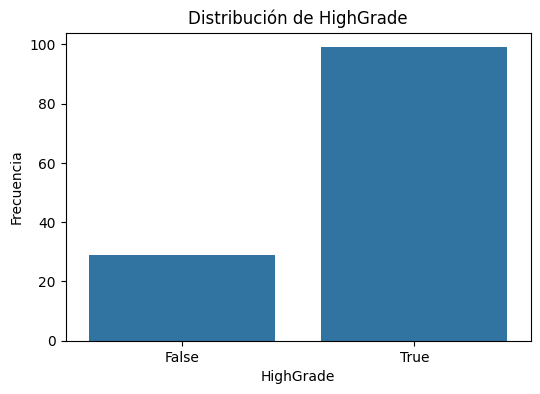

Porcentaje de True: 77.34%
Porcentaje de False: 22.66%


In [4]:
hg_value_counts = df['highGrade'].value_counts()
plt.figure(figsize=(6, 4))
sns.countplot(x='highGrade', data=df)
plt.title('Distribución de HighGrade')
plt.xlabel('HighGrade')
plt.ylabel('Frecuencia')
plt.show()

print(f"Porcentaje de True: {hg_value_counts[True] / len(df) * 100:.2f}%")
print(f"Porcentaje de False: {hg_value_counts[False] / len(df) * 100:.2f}%")

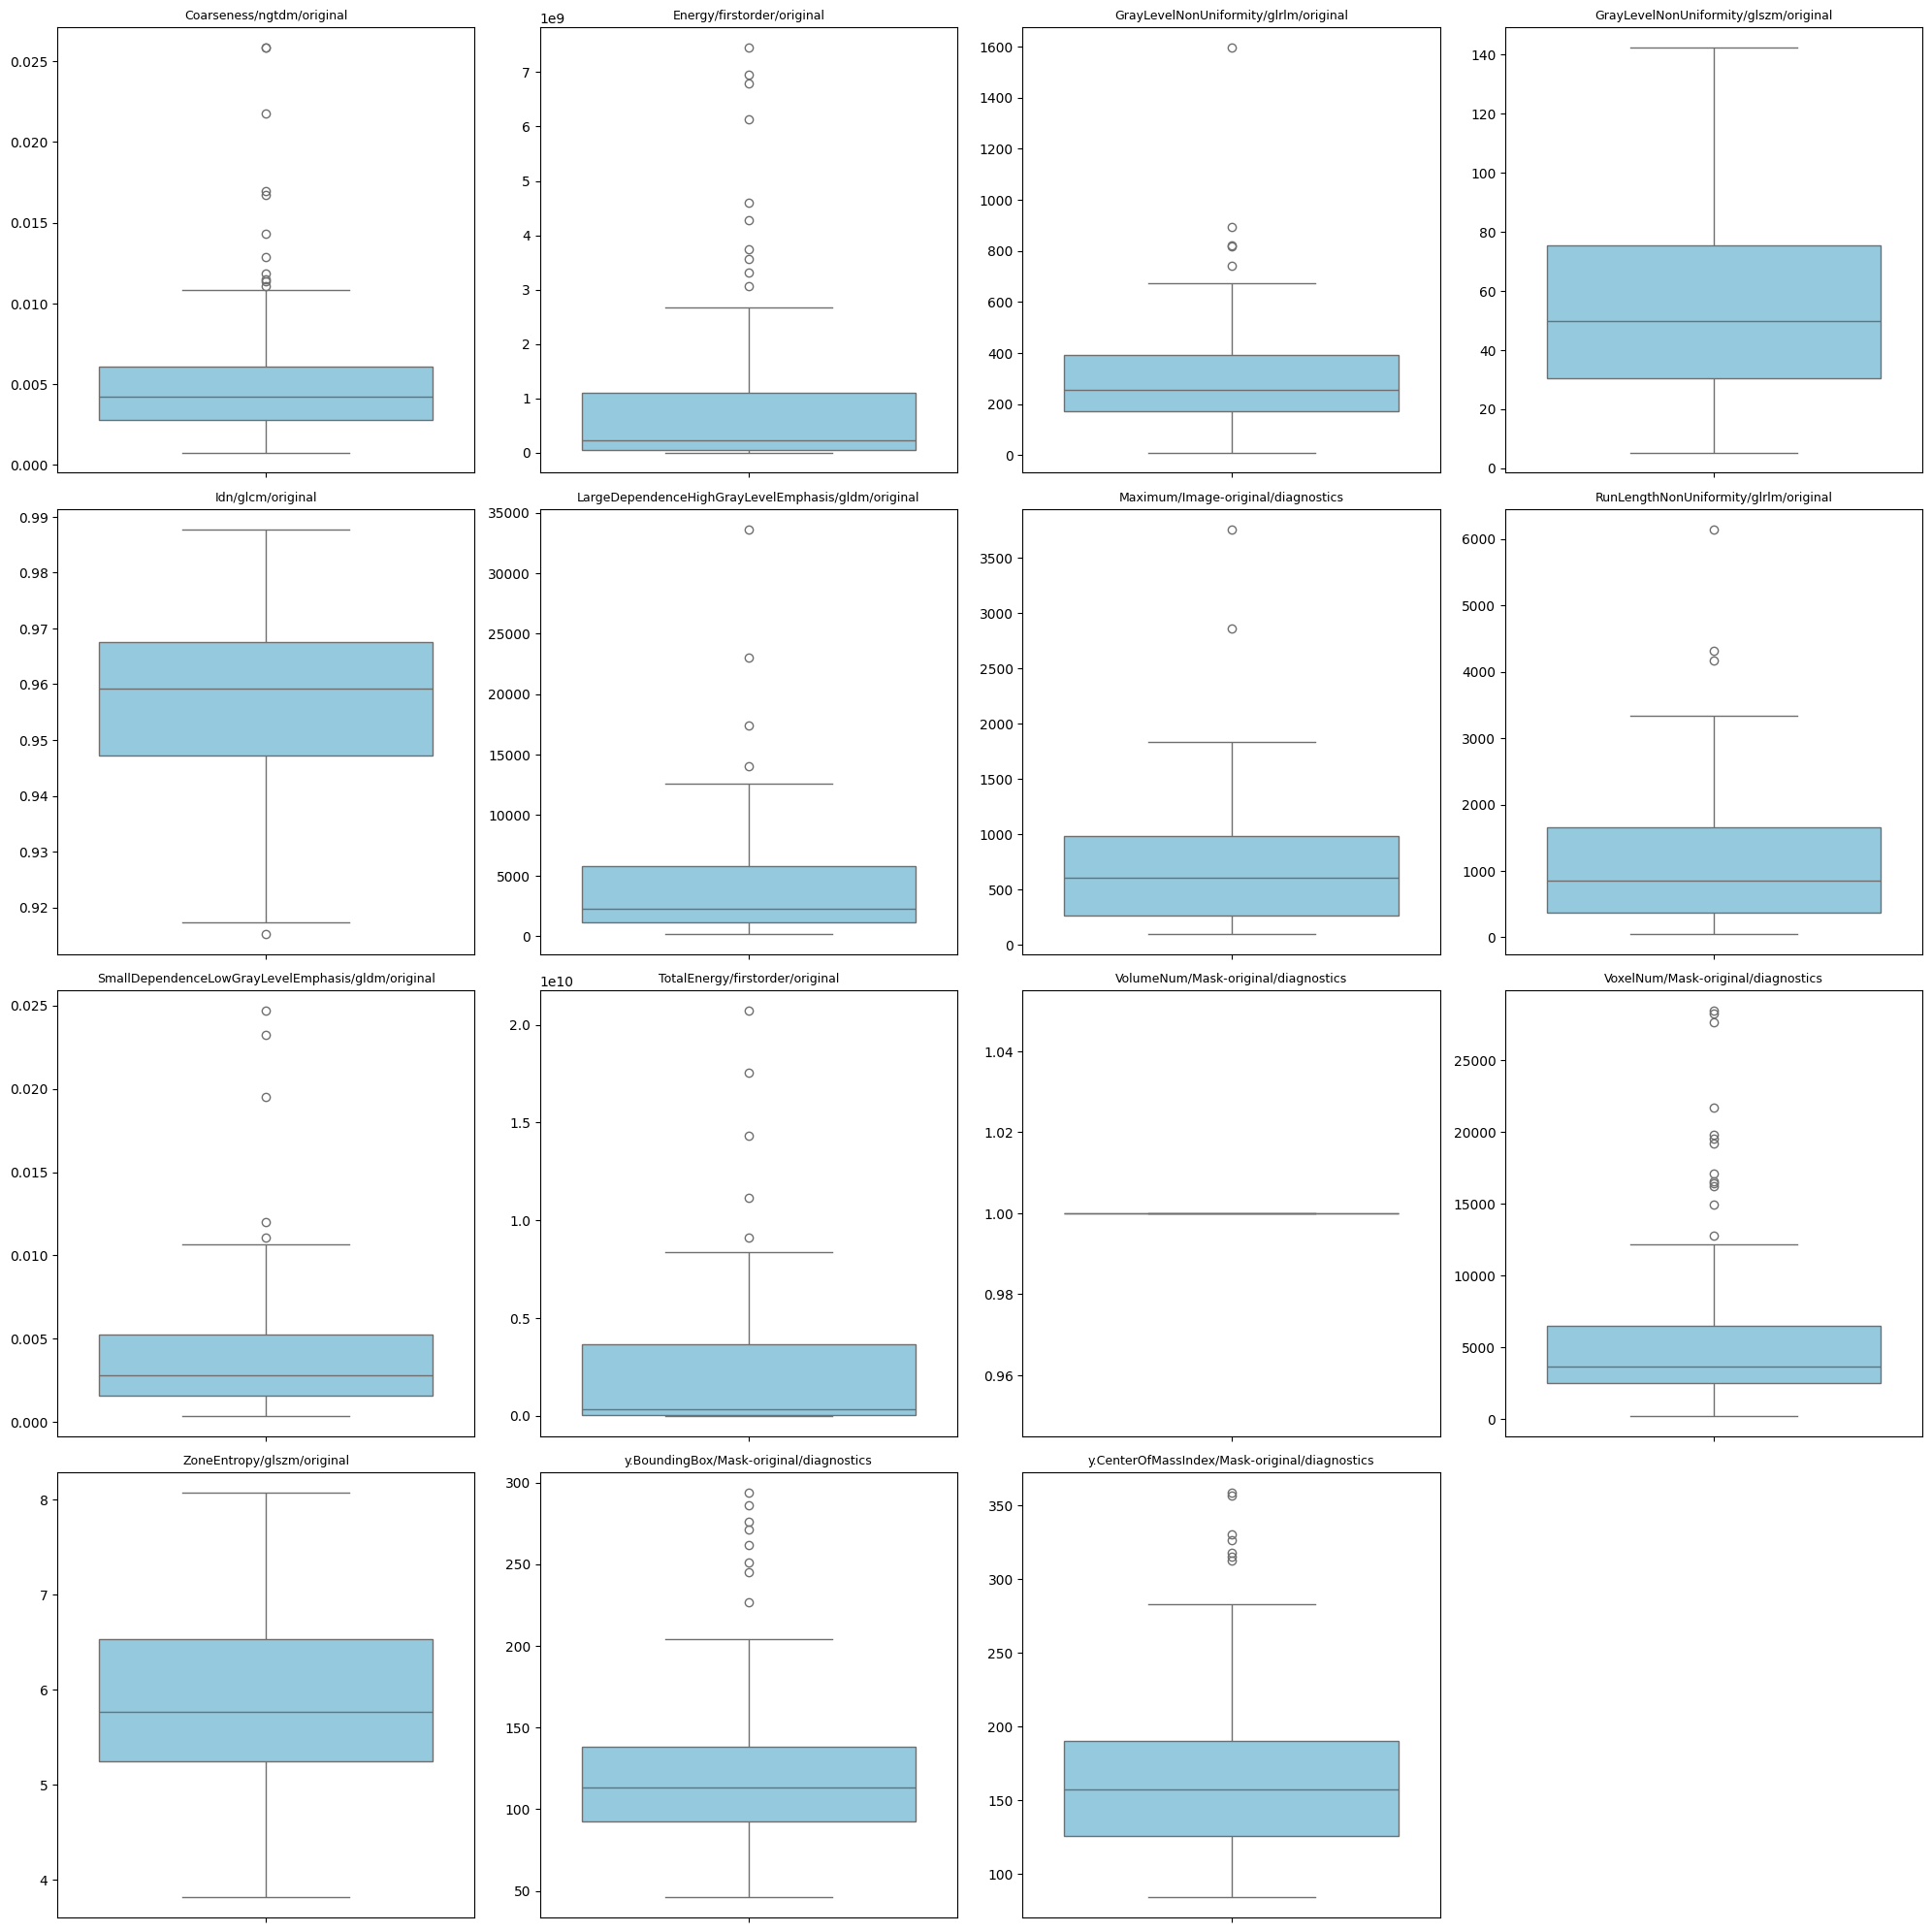

In [5]:
# diagramas de caja y bigote

radiomic_feat = df.drop(columns=['Id', 'highGrade'])
num_cols = len(radiomic_feat.columns)
cols = 4
rows = int(np.ceil(num_cols / cols))
plt.figure(figsize=(cols * 5, rows * 5))
for i, col in enumerate(radiomic_feat.columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=radiomic_feat[col], color="skyblue")
    plt.title(col, fontsize=9)
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout(pad=1.0)
plt.show()

## Entrenamiento de modelo

In [9]:
X = df.drop(columns=['Id', 'highGrade'])
y = df['highGrade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## Optimización de modelo con RandomizedSearchCV

In [12]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', {True: 1, False: 2}, {True: 1, False: 3}]
}

# función personalizada de scoring
def custom_scorer(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  roc_auc = roc_auc_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  return (accuracy + roc_auc + f1) / 3

scoring = 'roc_auc'
#scoring = make_scorer(custom_scorer)

new_rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=new_rf_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scoring,
    n_jobs=-1,
    cv=5,
    verbose=1,
    random_state=42
)
random_search.fit(X_train_scaled, y_train)

print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

best_rf_model = RandomForestClassifier(**random_search.best_params_, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini', 'class_weight': {True: 1, False: 2}}
Best score: 0.7148749999999999


RandomForestClassifier(class_weight={False: 2, True: 1}, max_depth=10,
                       random_state=42)

## Función de evaluación del modelo usando las métricas definidas en el documento

In [25]:
def evaluate_model(model_to_test, X_test, y_test):
  y_pred = model_to_test.predict(X_test)

  print(classification_report(y_test, y_pred))

  print("\n\n\n")

  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Predicción False', 'Predicción True'],
              yticklabels=['Verdaderos Negativos', 'Verdaderos Positivos'])
  plt.title('Matriz de confusión')
  plt.xlabel('Predicción')
  plt.ylabel('Valor real')
  plt.show()

  print("\n\n\n")

  accuracy = accuracy_score(y_test, y_pred)
  auc_roc = roc_auc_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  sensitivity = tp / (tp + fn)
  specificity = tn / (tn + fp)
  print(f"Exactitud (Accuracy): {accuracy}")
  print(f"Área bajo la curva (AUC-ROC): {auc_roc}")
  print(f"F1-score: {f1}")
  print(f"Sensibilidad: {sensitivity}")
  print(f"Especificidad: {specificity}")

## Comparación de modelo básico vs modelo con hiperparámetros

### Modelo básico

              precision    recall  f1-score   support

       False       0.75      0.50      0.60         6
        True       0.86      0.95      0.90        20

    accuracy                           0.85        26
   macro avg       0.81      0.72      0.75        26
weighted avg       0.84      0.85      0.83        26







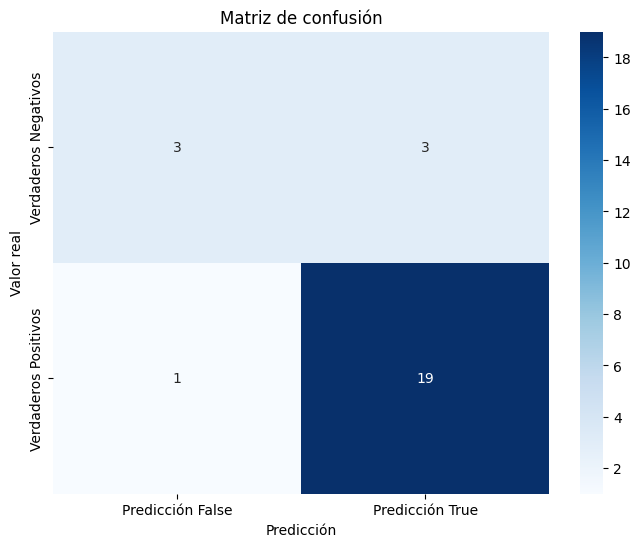





Exactitud (Accuracy): 0.8461538461538461
Área bajo la curva (AUC-ROC): 0.725
F1-score: 0.9047619047619048
Sensibilidad: 0.95
Especificidad: 0.5


In [26]:
evaluate_model(rf_model, X_test_scaled, y_test)

### Modelo mejorado con hiperparámetros

              precision    recall  f1-score   support

       False       0.75      0.50      0.60         6
        True       0.86      0.95      0.90        20

    accuracy                           0.85        26
   macro avg       0.81      0.72      0.75        26
weighted avg       0.84      0.85      0.83        26







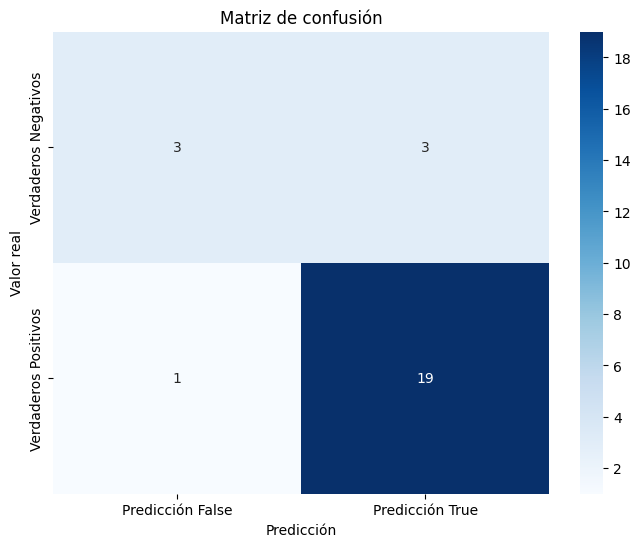





Exactitud (Accuracy): 0.8461538461538461
Área bajo la curva (AUC-ROC): 0.725
F1-score: 0.9047619047619048
Sensibilidad: 0.95
Especificidad: 0.5


In [27]:
evaluate_model(best_rf_model, X_test_scaled, y_test)

---
# OTRO INTENTO

In [16]:
def cap_outliers_iqr(df):
    df_capped = df.copy()
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_capped[col] = df[col].clip(lower, upper)
    return df_capped

new_df = cap_outliers_iqr(df)

In [17]:
radiomic_feat = new_df.drop(columns=['Id', 'highGrade'])

scaled = scaler.fit_transform(radiomic_feat)
radiomic_scaled = pd.DataFrame(scaled, columns=radiomic_feat.columns)
varianza_normalizada = radiomic_scaled.var().sort_values(ascending=False)
top_vars = varianza_normalizada.head(15).index
radiomic_scaled[top_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
GrayLevelNonUniformity/glszm/original,128.0,1.144917e-16,1.003929,-1.584258,-0.789048,-0.184070,0.630162,2.736021
Maximum/Image-original/diagnostics,128.0,-6.938894e-18,1.003929,-1.250905,-0.892579,-0.147454,0.651930,2.968692
y.BoundingBox/Mask-original/diagnostics,128.0,-1.734723e-17,1.003929,-1.796152,-0.632095,-0.106392,0.506928,2.215463
ZoneEntropy/glszm/original,128.0,-7.632783e-17,1.003929,-2.335814,-0.708148,-0.114033,0.747905,2.507446
VoxelNum/Mask-original/diagnostics,128.0,-8.673617e-18,1.003929,-1.317608,-0.679799,-0.343112,0.459456,2.168339
RunLengthNonUniformity/glrlm/original,128.0,-2.081668e-17,1.003929,-1.142598,-0.793640,-0.267436,0.594514,2.676745
Energy/firstorder/original,128.0,-1.040834e-17,1.003929,-0.803268,-0.748388,-0.560259,0.436341,2.213434
y.CenterOfMassIndex/Mask-original/diagnostics,128.0,2.012279e-16,1.003929,-1.567443,-0.769105,-0.160737,0.467230,2.321732
LargeDependenceHighGrayLevelEmphasis/gldm/original,128.0,-4.510281e-17,1.003929,-1.032053,-0.769480,-0.454594,0.534227,2.489788
GrayLevelNonUniformity/glrlm/original,128.0,9.020562e-17,1.003929,-1.678792,-0.744387,-0.245938,0.545423,2.480138


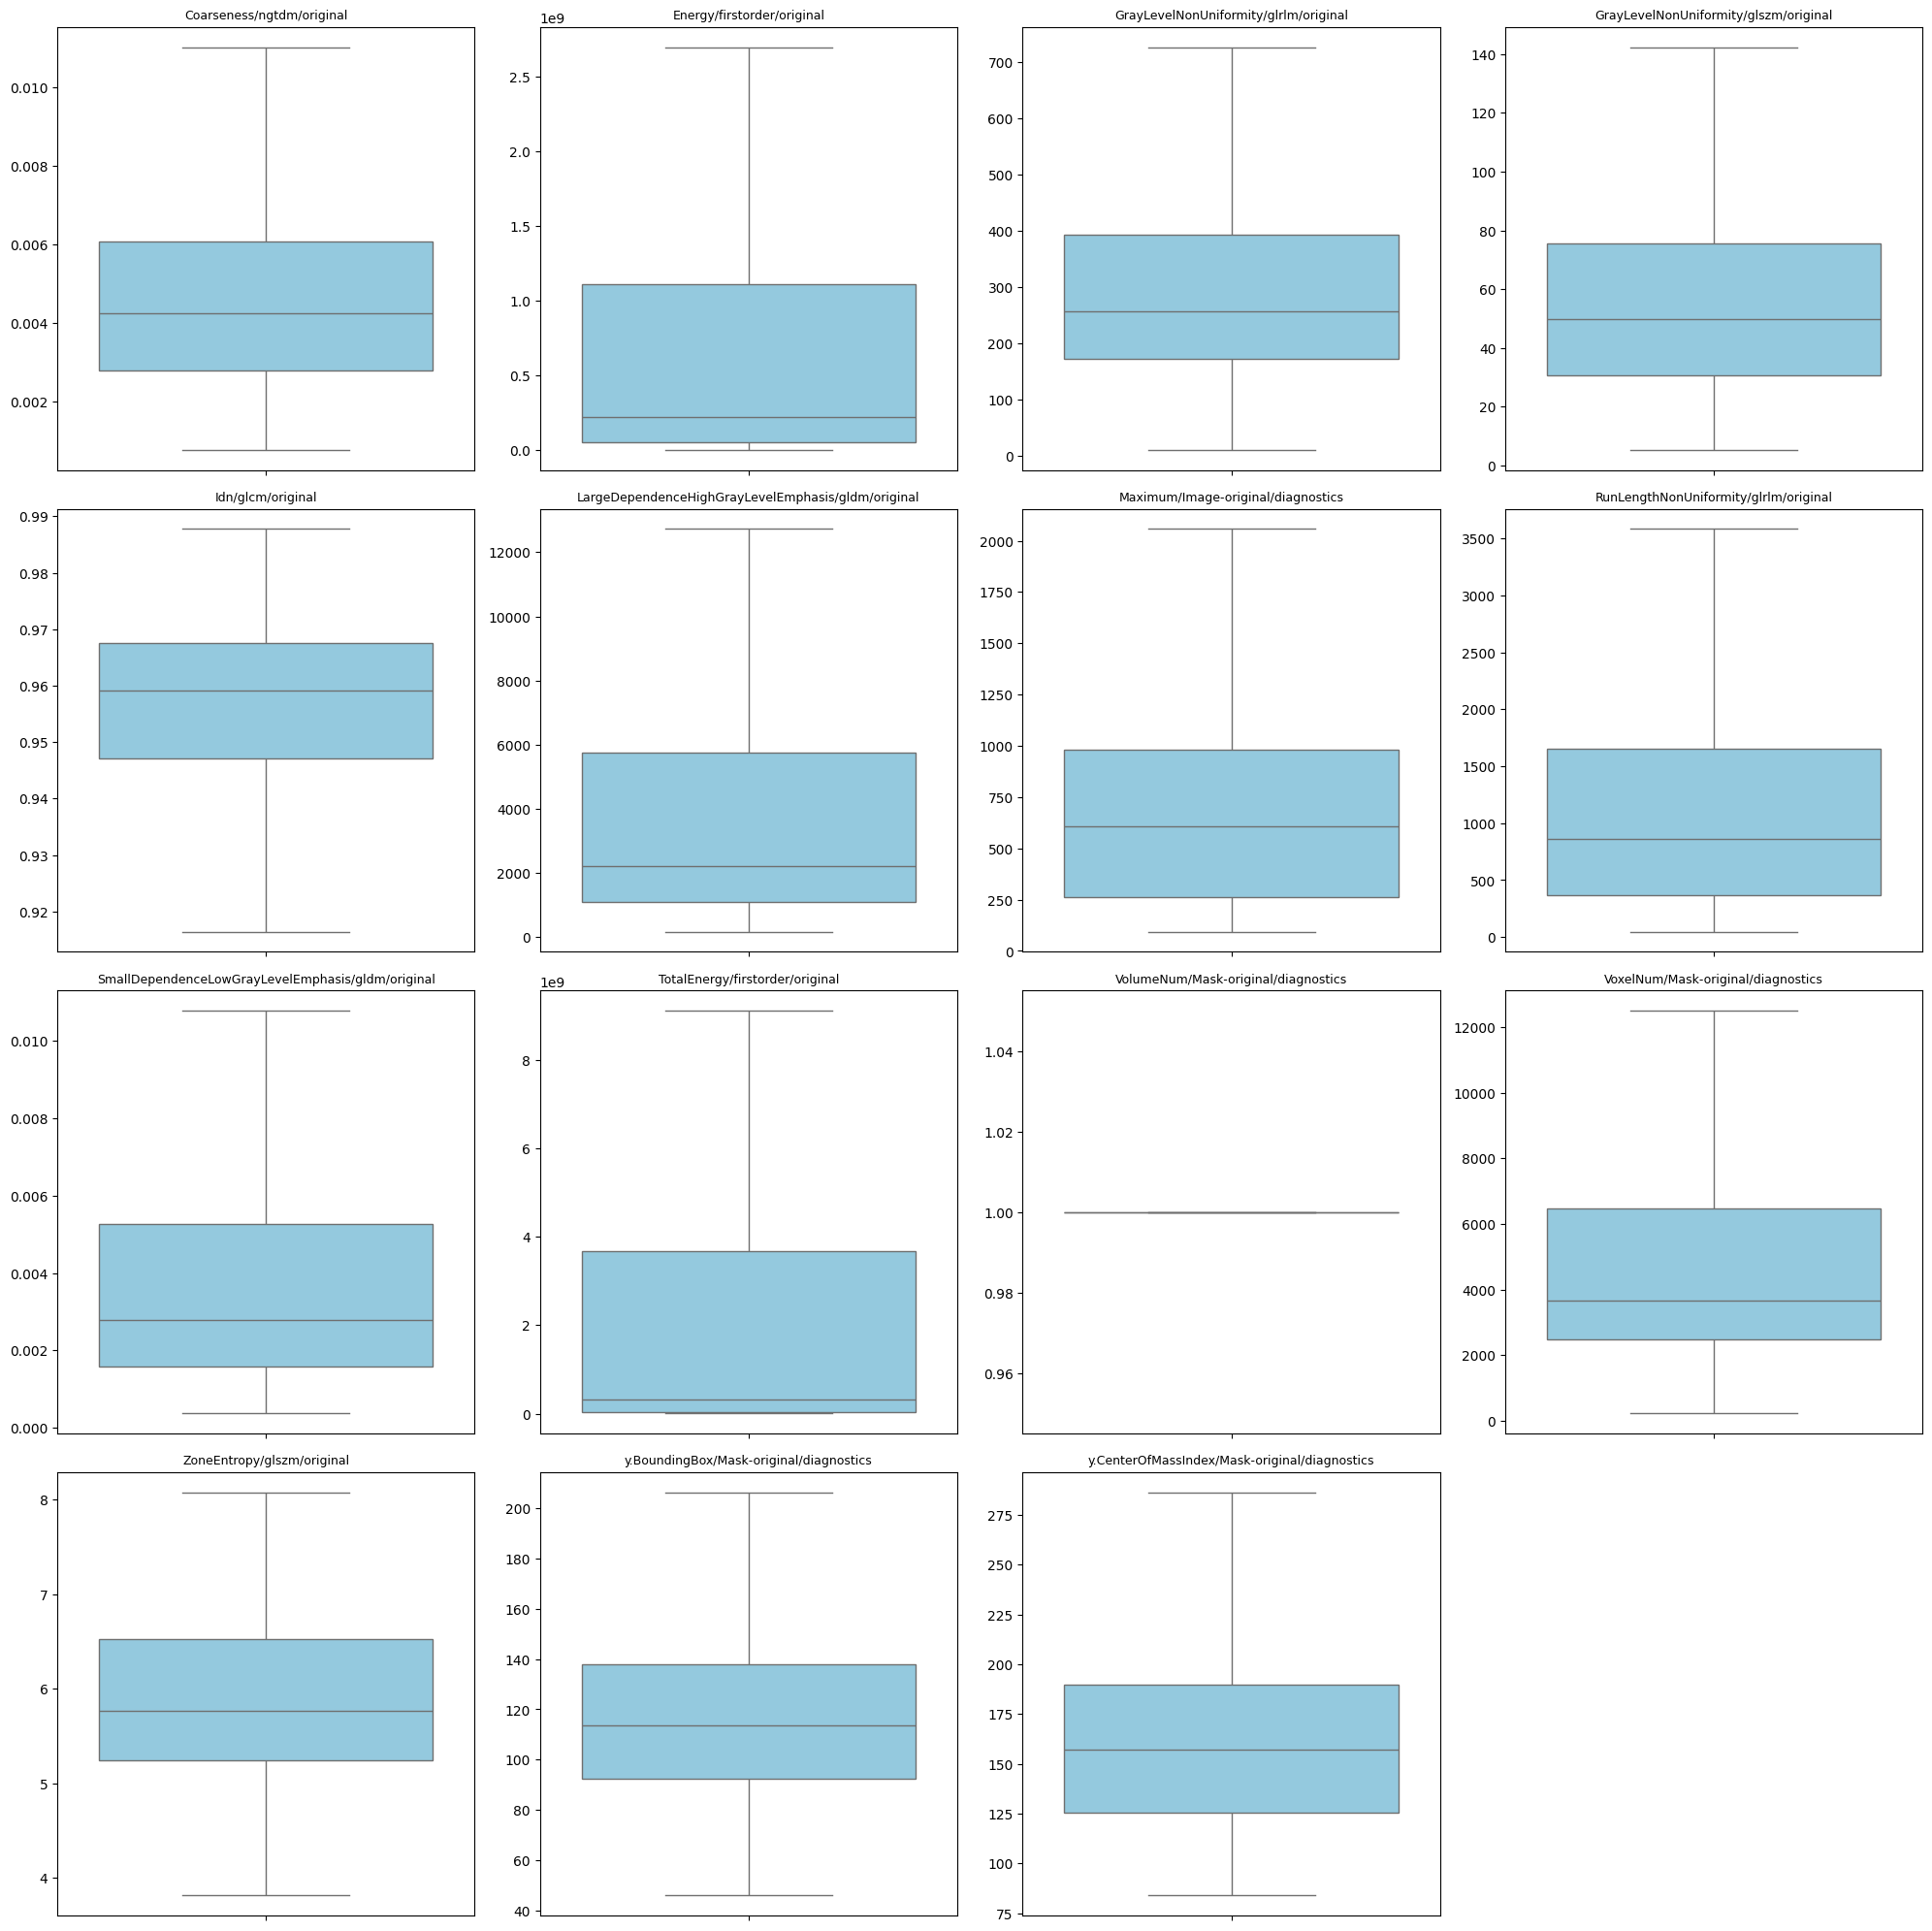

In [18]:
# diagramas de caja y bigote

radiomic_feat = new_df.drop(columns=['Id', 'highGrade'])
num_cols = len(radiomic_feat.columns)
cols = 4
rows = int(np.ceil(num_cols / cols))
plt.figure(figsize=(cols * 5, rows * 5))
for i, col in enumerate(radiomic_feat.columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=radiomic_feat[col], color="skyblue")
    plt.title(col, fontsize=9)
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout(pad=1.0)
plt.show()

In [19]:
new_X = new_df.drop(columns=['Id', 'highGrade'])
new_y = new_df['highGrade']
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42, stratify=new_y)

In [20]:
new_X_train_scaled = scaler.fit_transform(new_X_train)
new_X_test_scaled = scaler.transform(new_X_test)

In [21]:
new_rf_model = RandomForestClassifier(random_state=42)
new_rf_model.fit(new_X_train_scaled, new_y_train)

RandomForestClassifier(random_state=42)

In [22]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', {True: 1, False: 2}, {True: 1, False: 3}]
}

# función personalizada de scoring
def custom_scorer(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  roc_auc = roc_auc_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  return (accuracy + roc_auc + f1) / 3

scoring = 'roc_auc'
#scoring = make_scorer(custom_scorer)

base_rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=base_rf_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scoring,
    n_jobs=-1,
    cv=5,
    verbose=1,
    random_state=42
)
random_search.fit(new_X_train_scaled, new_y_train)

print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

new_best_rf_model = RandomForestClassifier(**random_search.best_params_, random_state=42)
new_best_rf_model.fit(new_X_train_scaled, new_y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini', 'class_weight': {True: 1, False: 2}}
Best score: 0.7253125


RandomForestClassifier(class_weight={False: 2, True: 1}, max_depth=20,
                       n_estimators=200, random_state=42)

              precision    recall  f1-score   support

       False       0.75      0.50      0.60         6
        True       0.86      0.95      0.90        20

    accuracy                           0.85        26
   macro avg       0.81      0.72      0.75        26
weighted avg       0.84      0.85      0.83        26







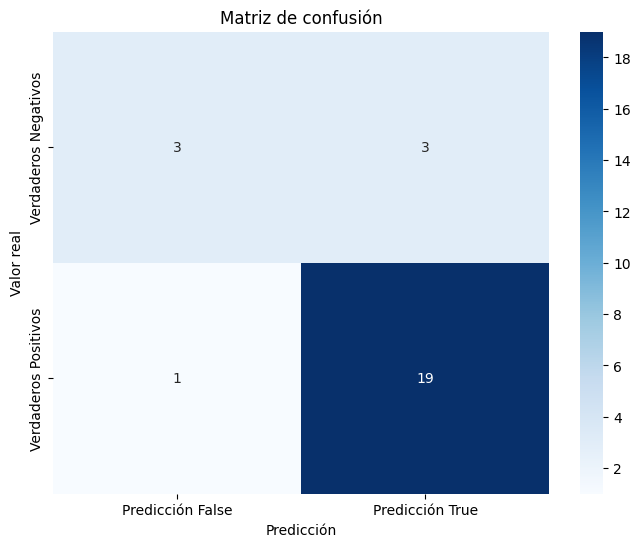





Exactitud (Accuracy): 0.8461538461538461
Área bajo la curva (AUC-ROC): 0.725
F1-score: 0.9047619047619048
Sensibilidad: 0.95
Especificidad: 0.5


In [28]:
evaluate_model(new_rf_model, new_X_test_scaled, new_y_test)

              precision    recall  f1-score   support

       False       0.50      0.33      0.40         6
        True       0.82      0.90      0.86        20

    accuracy                           0.77        26
   macro avg       0.66      0.62      0.63        26
weighted avg       0.74      0.77      0.75        26







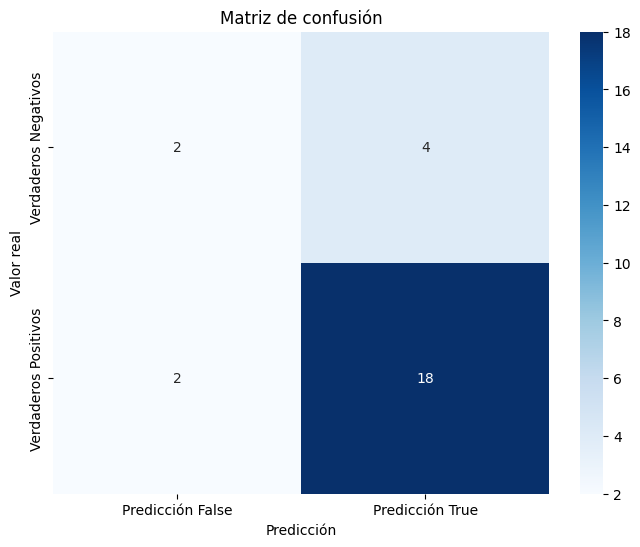





Exactitud (Accuracy): 0.7692307692307693
Área bajo la curva (AUC-ROC): 0.6166666666666667
F1-score: 0.8571428571428571
Sensibilidad: 0.9
Especificidad: 0.3333333333333333


In [29]:
evaluate_model(new_best_rf_model, new_X_test_scaled, new_y_test)